In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix, roc_auc_score, roc_curve , accuracy_score, precision_score ,recall_score , f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PowerTransformer

from scipy.stats import skew, kurtosis


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
df = pd.read_csv("../data/internet_service_churn.csv")
df.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [4]:
print("Dataset shape:", df.shape)

Dataset shape: (72274, 11)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


In [6]:
for i, n in enumerate(df.isnull().sum()):
    if n!=0:
        print(f'{df.columns[i]} = {round(n/len(df),3)}%')

reamining_contract = 0.298%
download_avg = 0.005%
upload_avg = 0.005%


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,72274.0,846318.243462,489102.168744,15.00,422216.50,847784.00,1269562.00,1689744.00
is_tv_subscriber,72274.0,0.815259,0.388090,0.00,1.00,1.00,1.00,1.00
is_movie_package_subscriber,72274.0,0.334629,0.471864,0.00,0.00,0.00,1.00,1.00
subscription_age,72274.0,2.450051,2.034990,-0.02,0.93,1.98,3.30,12.80
bill_avg,72274.0,18.942483,13.215386,0.00,13.00,19.00,22.00,406.00
reamining_contract,50702.0,0.716039,0.697102,0.00,0.00,0.57,1.31,2.92
service_failure_count,72274.0,0.274234,0.816621,0.00,0.00,0.00,0.00,19.00
download_avg,71893.0,43.689911,63.405963,0.00,6.70,27.80,60.50,4415.20
upload_avg,71893.0,4.192076,9.818896,0.00,0.50,2.10,4.80,453.30
download_over_limit,72274.0,0.207613,0.997123,0.00,0.00,0.00,0.00,7.00


In [8]:
df['churn'].value_counts(normalize=True) * 100

churn
1    55.414118
0    44.585882
Name: proportion, dtype: float64

C:\Users\halah\AppData\Local\Temp\ipykernel_26680\2957053831.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df, palette=['skyblue','salmon'])


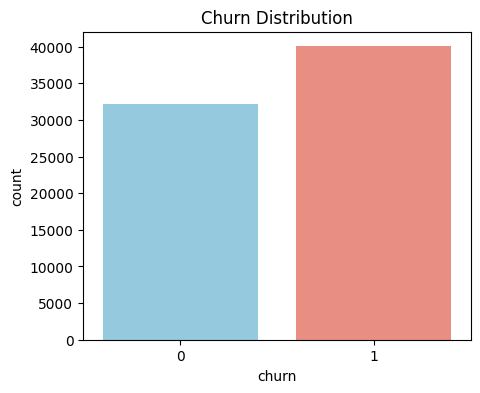

In [9]:
plt.figure(figsize=(5,4))
sns.countplot(x='churn', data=df, palette=['skyblue','salmon'])
plt.title("Churn Distribution")
plt.show()

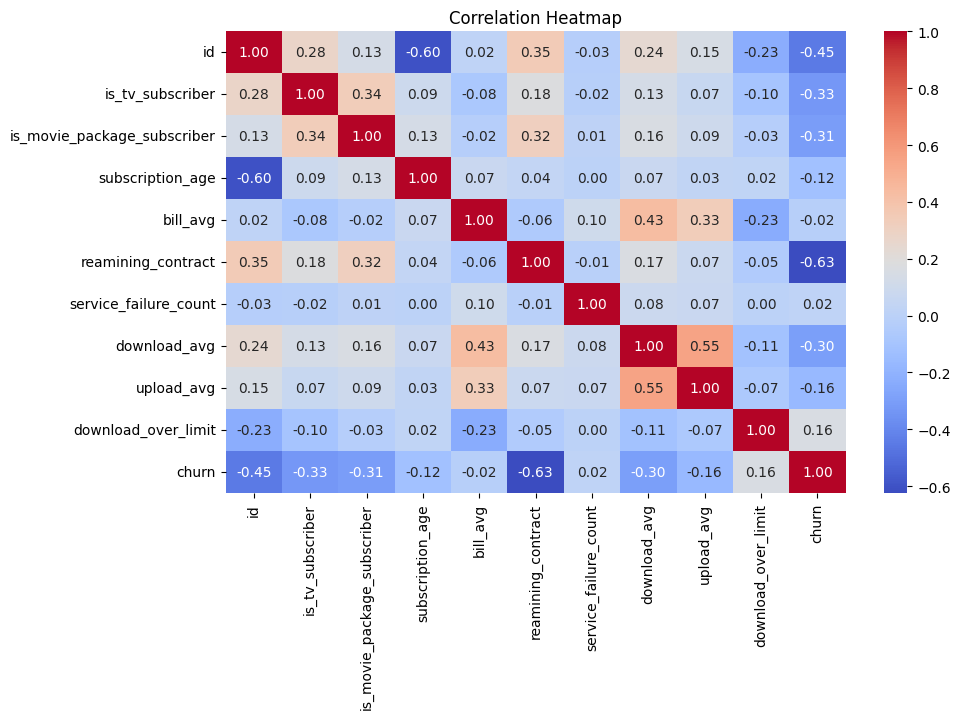

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

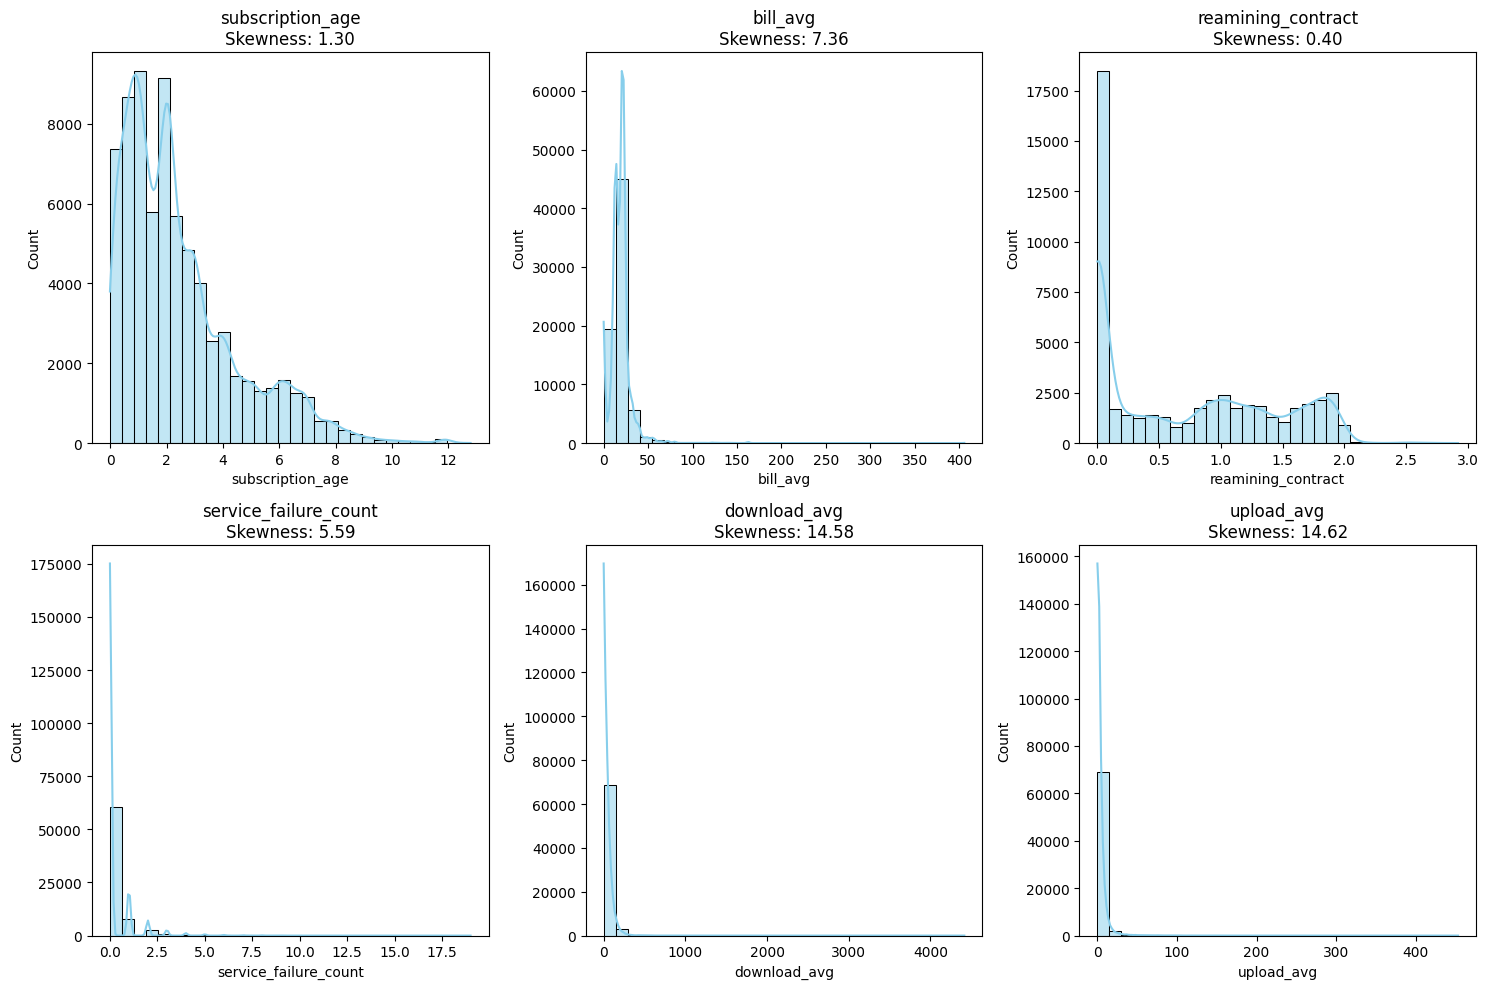

In [11]:
numeric_cols = [
    'subscription_age',
    'bill_avg',
    'reamining_contract',
    'service_failure_count',
    'download_avg',
    'upload_avg'
]

plt.figure(figsize=(15,10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue',edgecolor='black')
    skewness = skew(df[col].dropna())
    plt.title(f"{col}\nSkewness: {skewness:.2f}")

plt.tight_layout()
plt.show()

In [12]:
df1 = df.copy()

In [13]:

df1.rename(columns={
    'reamining_contract': 'remaining_contract',
    'is_tv_subscriber': 'tv_subscriber',
    'is_movie_package_subscriber': 'movie_package_subscriber',
}, inplace=True)

print(df1.columns)

Index(['id', 'tv_subscriber', 'movie_package_subscriber', 'subscription_age',
       'bill_avg', 'remaining_contract', 'service_failure_count',
       'download_avg', 'upload_avg', 'download_over_limit', 'churn'],
      dtype='object')


according to my domain knowledge ill fill nan with 0

In [14]:
df1['remaining_contract'] = df1['remaining_contract'].fillna(0)

to decide whether to impute missing values for download_avg & upload_avg based on subscription_age or avg_bill depends on which variable has a stronger relationship with usage, here ill see how strongly download_avg / upload_avg correlate with subscription_age vs bill_avg.

In [15]:
print("Correlation with download_avg:")
print(df1[['subscription_age', 'bill_avg', 'download_avg']].corr()['download_avg'])

print("\nCorrelation with upload_avg:")
print(df1[['subscription_age', 'bill_avg', 'upload_avg']].corr()['upload_avg'])

Correlation with download_avg:
subscription_age    0.069331
bill_avg            0.431674
download_avg        1.000000
Name: download_avg, dtype: float64

Correlation with upload_avg:
subscription_age    0.030277
bill_avg            0.334236
upload_avg          1.000000
Name: upload_avg, dtype: float64


This shows which grouping produces a more gradual, logical progression of values (less random, more predictive).

In [16]:
age_group_medians = df1.groupby(pd.qcut(df1['subscription_age'], q=5))[['download_avg','upload_avg']].median()

bill_group_medians = df1.groupby(pd.qcut(df1['bill_avg'], q=5))[['download_avg','upload_avg']].median()

print("\nMedian values by subscription_age groups:\n", age_group_medians)
print("\nMedian values by avg_bill groups:\n", bill_group_medians)


Median values by subscription_age groups:
                   download_avg  upload_avg
subscription_age                          
(-0.021, 0.76]            25.4         1.8
(0.76, 1.52]              29.4         2.2
(1.52, 2.32]              20.2         1.6
(2.32, 3.9]               27.0         2.1
(3.9, 12.8]               36.8         2.8

Median values by avg_bill groups:
                 download_avg  upload_avg
bill_avg                                
(-0.001, 12.0]          12.2         0.9
(12.0, 16.0]            32.8         2.5
(16.0, 21.0]            26.7         2.0
(21.0, 24.0]            24.7         1.9
(24.0, 406.0]           50.7         4.0


C:\Users\halah\AppData\Local\Temp\ipykernel_26680\2601865872.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_medians = df1.groupby(pd.qcut(df1['subscription_age'], q=5))[['download_avg','upload_avg']].median()
C:\Users\halah\AppData\Local\Temp\ipykernel_26680\2601865872.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bill_group_medians = df1.groupby(pd.qcut(df1['bill_avg'], q=5))[['download_avg','upload_avg']].median()


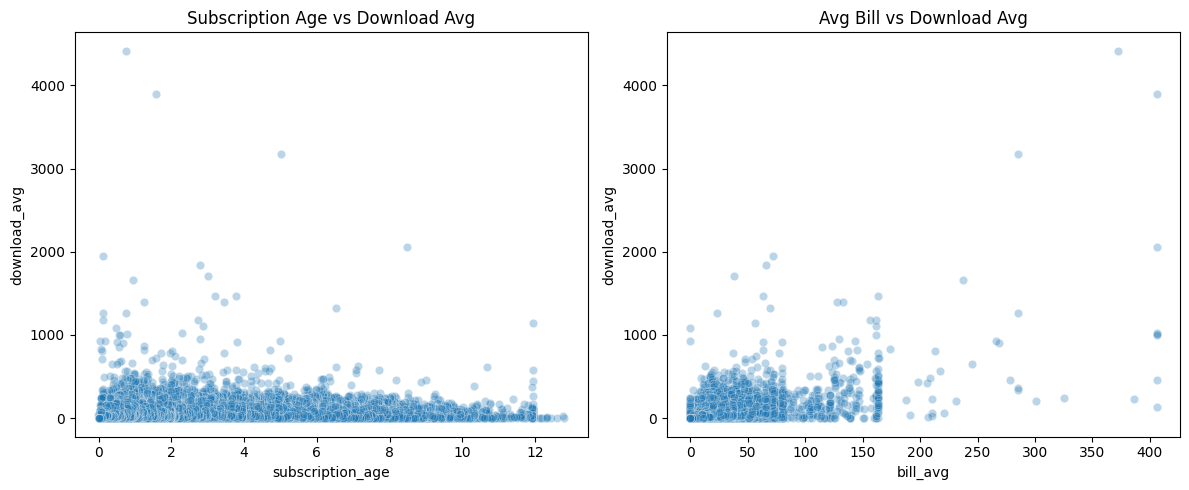

In [17]:

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x='subscription_age', y='download_avg', data=df1, alpha=0.3)
plt.title("Subscription Age vs Download Avg")

plt.subplot(1,2,2)
sns.scatterplot(x='bill_avg', y='download_avg', data=df1, alpha=0.3)
plt.title("Avg Bill vs Download Avg")

plt.tight_layout()
plt.show()

check if someone has download_avg as 0 yet payed a bill

In [18]:
zero_download_paid = df1[(df1['download_avg'] == 0) & (df1['bill_avg'] > 0)]

print("Number of customers with 0 downloads but paid a bill:", len(zero_download_paid))
display(zero_download_paid.head(10))

Number of customers with 0 downloads but paid a bill: 7769


,id,tv_subscriber,movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
3,27,0,0,6.87,21,0.00,1,0.0,0.0,0,1
7,84,0,0,5.48,14,0.00,1,0.0,0.0,0,1
12,213,0,0,6.64,10,0.00,0,0.0,0.0,0,1
13,222,0,0,5.53,14,0.00,0,0.0,0.0,0,1
14,270,0,0,6.97,23,0.28,0,0.0,0.0,0,1
17,417,0,0,6.45,40,0.00,0,0.0,0.0,0,1
18,475,0,0,6.81,14,0.00,0,0.0,0.0,0,1
24,608,0,0,8.57,20,0.00,0,0.0,0.0,0,1
26,642,0,0,5.21,14,0.00,0,0.0,0.0,0,1
28,680,0,0,7.02,13,0.00,0,0.0,0.0,0,1


In [19]:
zero_download_paid.groupby(['tv_subscriber', 'movie_package_subscriber']).size()

tv_subscriber  movie_package_subscriber
0              0                           3763
1              0                           2740
               1                           1266
dtype: int64

In [20]:
print("Median bill (0 downloads, bill>0):", zero_download_paid['bill_avg'].median())
print("Median bill (download>0):", df[df['download_avg'] > 0]['bill_avg'].median())

Median bill (0 downloads, bill>0): 20.0
Median bill (download>0): 20.0


In [21]:
zero_download_paid['upload_avg'].value_counts().head()

upload_avg
0.0    7764
0.1       4
0.4       1
Name: count, dtype: int64

ill fill nan for download_avg/upload_avg:
if customer is a tv_subscriber/movie_package_subscriber -> i will fill it with 0 bcoz the bill is most likely concerning these sevices
if customer is an internet user (meaning they arent subscribed to a service yet payed a bill) -> ill use the bill_avg column median as the imputation driver

In [22]:
mask_non_internet = (
    (df1['download_avg'].isna() | df1['upload_avg'].isna()) &
    ((df1['tv_subscriber'] == 1) | (df1['movie_package_subscriber'] == 1))
)
df1.loc[mask_non_internet, ['download_avg', 'upload_avg']] = 0

In [23]:
mask_internet = (
    (df1['download_avg'].isna() | df1['upload_avg'].isna()) &
    ((df1['tv_subscriber'] == 0) & (df1['movie_package_subscriber'] == 0))
)


df1['bill_bin'] = pd.qcut(df1['bill_avg'], q=10, duplicates='drop') 


df1['download_avg'] = df1.groupby('bill_bin')['download_avg'].transform(
    lambda x: x.fillna(x.median())
)
df1['upload_avg'] = df1.groupby('bill_bin')['upload_avg'].transform(
    lambda x: x.fillna(x.median())
)


df1 = df1.drop(columns=['bill_bin'])

C:\Users\halah\AppData\Local\Temp\ipykernel_26680\3556447712.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1['download_avg'] = df1.groupby('bill_bin')['download_avg'].transform(
C:\Users\halah\AppData\Local\Temp\ipykernel_26680\3556447712.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1['upload_avg'] = df1.groupby('bill_bin')['upload_avg'].transform(


In [24]:
df1.isna().sum()

id                          0
tv_subscriber               0
movie_package_subscriber    0
subscription_age            0
bill_avg                    0
remaining_contract          0
service_failure_count       0
download_avg                0
upload_avg                  0
download_over_limit         0
churn                       0
dtype: int64

In [25]:
df1.duplicated().sum()

np.int64(0)

In [26]:
df1 = df1.drop(columns=['id'])

In [27]:
df1['service_failure_count_1'] = np.sqrt(df1['service_failure_count'])

In [28]:
df1['bill_avg_1'] = np.log1p(df1['download_avg'])
df1['download_avg_1'] = np.log1p(df1['download_avg'])
df1['upload_avg_1'] = np.log1p(df1['upload_avg'])

In [29]:
cols = ['bill_avg',
        'service_failure_count', 'download_avg', 'upload_avg']
print("Original Skewness:")
for col in cols:
    print(f"{col}: {skew(df1[col].dropna()):.2f}")

for col in cols:
    df1[col + '_1'] = np.log1p(df1[col])

print("\nSkewness after log1p:")
for col in cols:
    print(f"{col}_1: {skew(df1[col + '_1'].dropna()):.2f}")

Original Skewness:
bill_avg: 7.36
service_failure_count: 5.59
download_avg: 14.58
upload_avg: 14.64

Skewness after log1p:
bill_avg_1: -2.12
service_failure_count_1: 2.58
download_avg_1: -0.65
upload_avg_1: 0.59


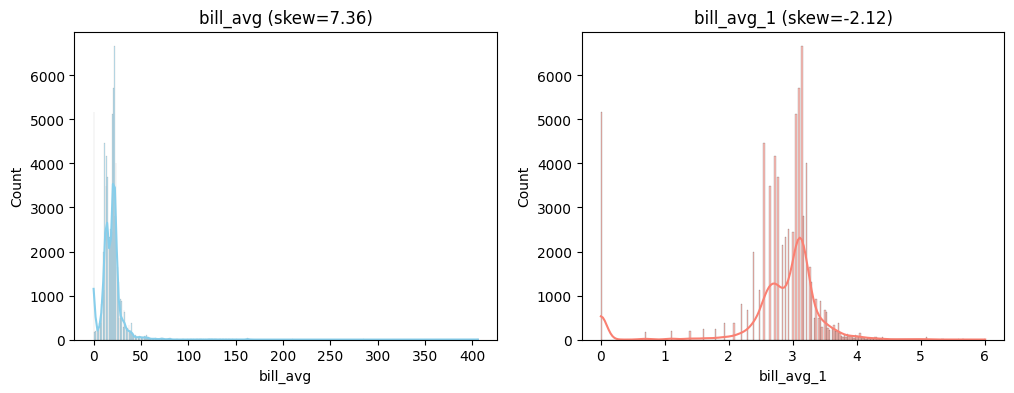

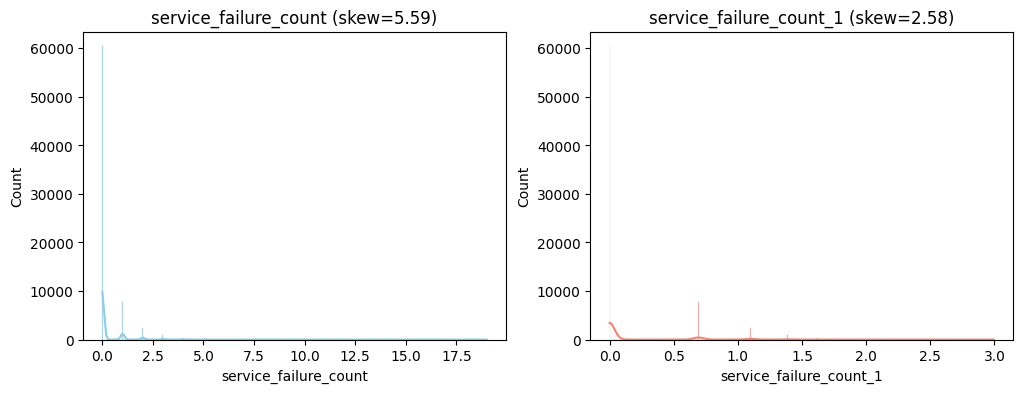

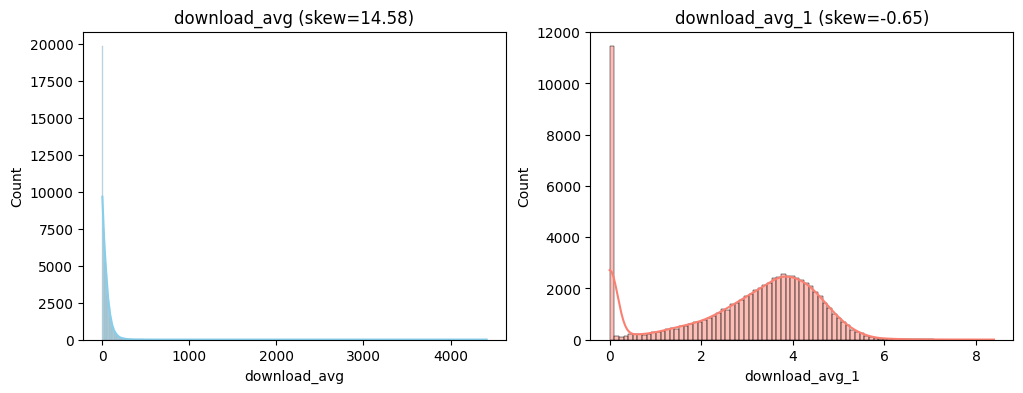

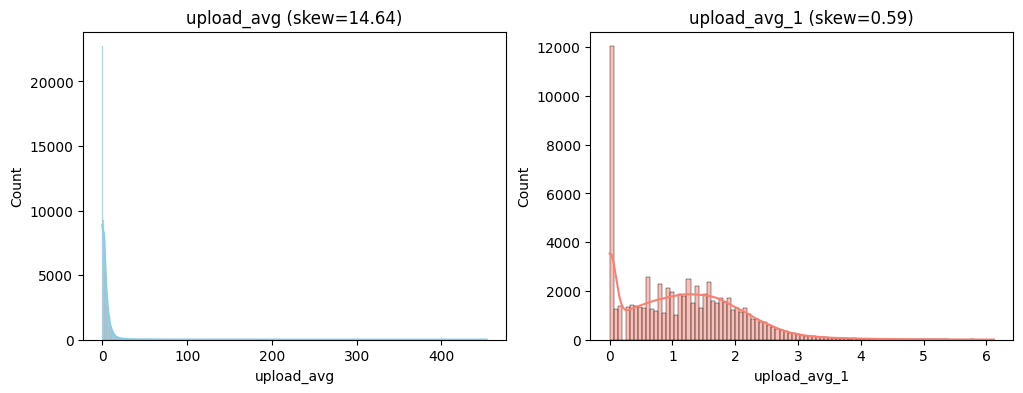

In [30]:
for col in cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))


    sns.histplot(df1[col].dropna(), kde=True, ax=axes[0], color="skyblue", edgecolor="black")
    axes[0].set_title(f"{col} (skew={skew(df1[col].dropna()):.2f})")

    sns.histplot(df1[col + '_1'].dropna(), kde=True, ax=axes[1], color="salmon", edgecolor="black")
    axes[1].set_title(f"{col}_1 (skew={skew(df1[col + '_1'].dropna()):.2f})")

    plt.show()

In [31]:

pt = PowerTransformer(method='yeo-johnson')

cols1 = ['bill_avg_1', 'service_failure_count_1']

df1[[col for col in cols1]] = pt.fit_transform(df1[cols1])

In [32]:
for col in cols1:
    print(f"{col}: {skew(df1[col].dropna()):.2f}")

bill_avg_1: 0.10
service_failure_count_1: 1.81


In [33]:
df1.head()

,tv_subscriber,movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,service_failure_count_1,bill_avg_1,download_avg_1,upload_avg_1
0,1,0,11.95,25,0.14,0,8.4,2.3,0,0,-0.443225,0.659809,2.240710,1.193922
1,0,0,8.22,0,0.00,0,0.0,0.0,0,1,-0.443225,-2.388366,0.000000,0.000000
2,1,0,8.91,16,0.00,0,13.7,0.9,0,1,-0.443225,-0.115703,2.687847,0.641854
3,0,0,6.87,21,0.00,1,0.0,0.0,0,1,2.249919,0.338042,0.000000,0.000000
4,0,0,6.39,0,0.00,0,0.0,0.0,0,1,-0.443225,-2.388366,0.000000,0.000000


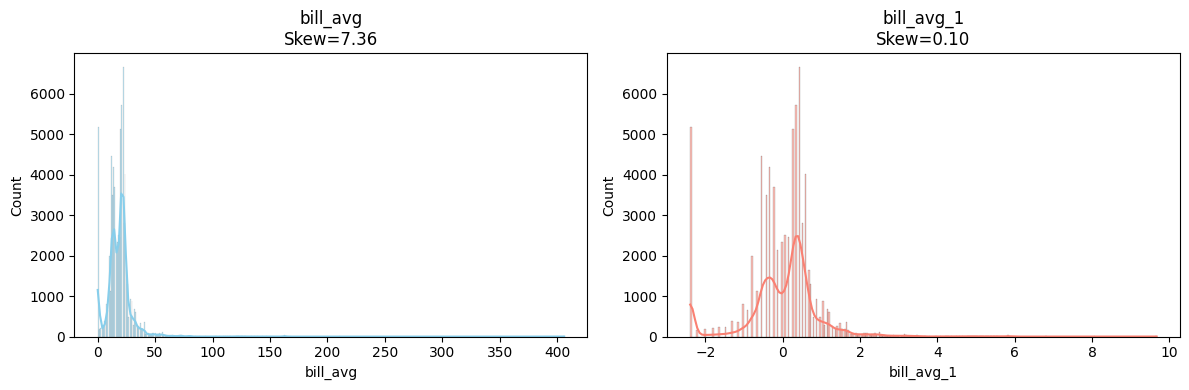

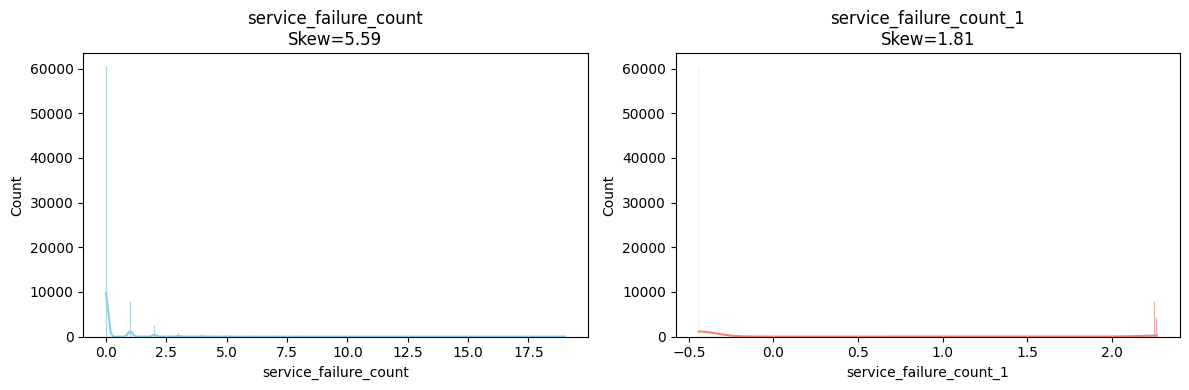

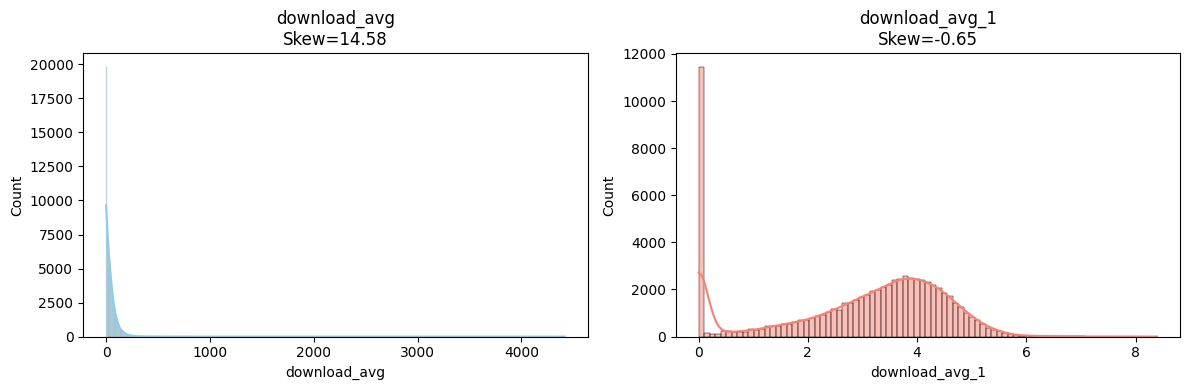

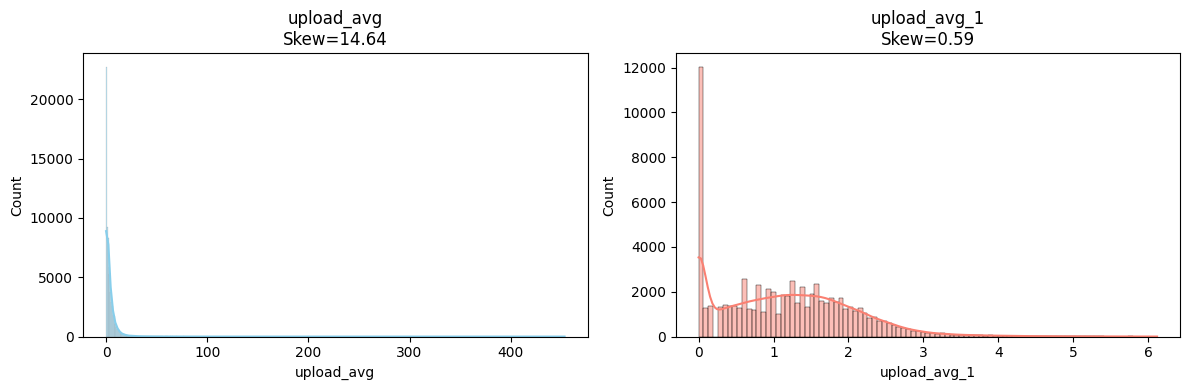

In [34]:
pairs = [
    ("bill_avg", "bill_avg_1"),
    ("service_failure_count", "service_failure_count_1"),
    ("download_avg", "download_avg_1"),
    ("upload_avg", "upload_avg_1")
]

for original, transformed in pairs:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(df1[original].dropna(), kde=True, color="skyblue", edgecolor="black", ax=axes[0])
    axes[0].set_title(f"{original}\nSkew={skew(df1[original].dropna()):.2f}")

    sns.histplot(df1[transformed].dropna(), kde=True, color="salmon", edgecolor="black", ax=axes[1])
    axes[1].set_title(f"{transformed}\nSkew={skew(df1[transformed].dropna()):.2f}")

    plt.tight_layout()
    plt.show()

C:\Users\halah\AppData\Local\Temp\ipykernel_26680\1306631483.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='churn', data=df1, palette={'skyblue', 'salmon'})


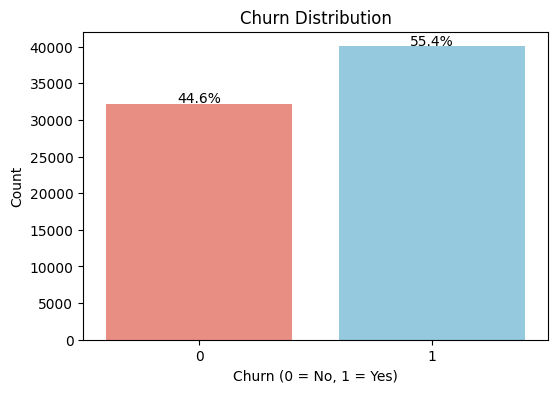

In [35]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='churn', data=df1, palette={'skyblue', 'salmon'})
total = len(df1)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 200,   # adjust +200 if labels overlap
            f'{100*height/total:.1f}%', ha='center')

plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

C:\Users\halah\AppData\Local\Temp\ipykernel_26680\4004212236.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='churn', y=col, data=df1,palette={'skyblue', 'salmon'}, estimator='mean', ci=None)
C:\Users\halah\AppData\Local\Temp\ipykernel_26680\4004212236.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='churn', y=col, data=df1,palette={'skyblue', 'salmon'}, estimator='mean', ci=None)


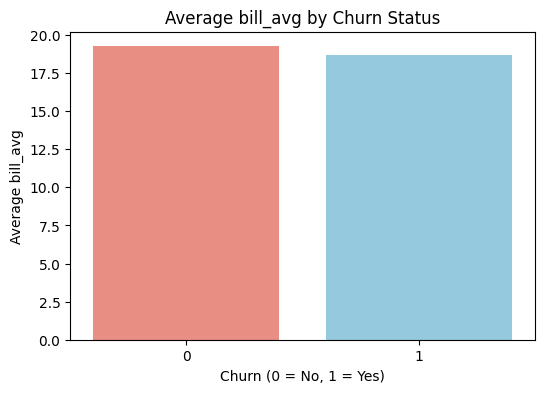

C:\Users\halah\AppData\Local\Temp\ipykernel_26680\4004212236.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='churn', y=col, data=df1,palette={'skyblue', 'salmon'}, estimator='mean', ci=None)
C:\Users\halah\AppData\Local\Temp\ipykernel_26680\4004212236.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='churn', y=col, data=df1,palette={'skyblue', 'salmon'}, estimator='mean', ci=None)


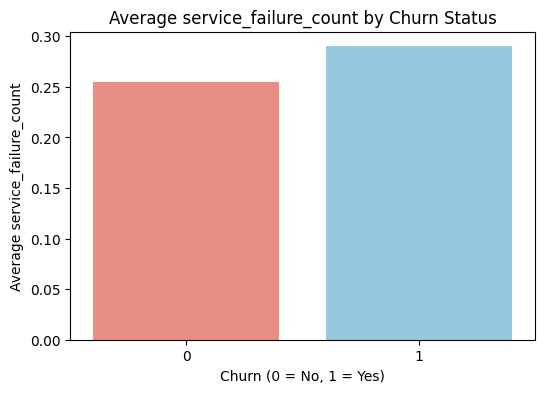

C:\Users\halah\AppData\Local\Temp\ipykernel_26680\4004212236.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='churn', y=col, data=df1,palette={'skyblue', 'salmon'}, estimator='mean', ci=None)
C:\Users\halah\AppData\Local\Temp\ipykernel_26680\4004212236.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='churn', y=col, data=df1,palette={'skyblue', 'salmon'}, estimator='mean', ci=None)


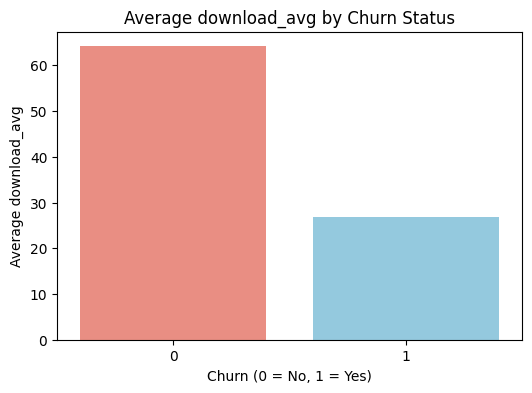

C:\Users\halah\AppData\Local\Temp\ipykernel_26680\4004212236.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='churn', y=col, data=df1,palette={'skyblue', 'salmon'}, estimator='mean', ci=None)
C:\Users\halah\AppData\Local\Temp\ipykernel_26680\4004212236.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='churn', y=col, data=df1,palette={'skyblue', 'salmon'}, estimator='mean', ci=None)


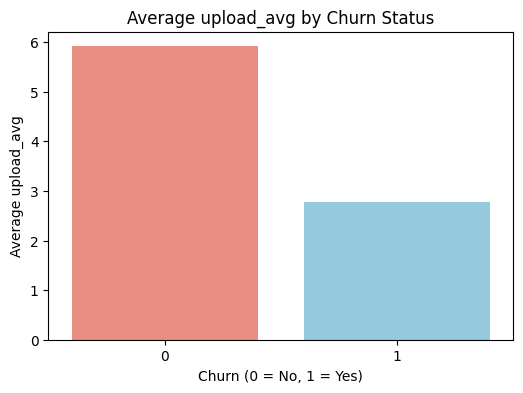

C:\Users\halah\AppData\Local\Temp\ipykernel_26680\4004212236.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='churn', y=col, data=df1,palette={'skyblue', 'salmon'}, estimator='mean', ci=None)
C:\Users\halah\AppData\Local\Temp\ipykernel_26680\4004212236.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='churn', y=col, data=df1,palette={'skyblue', 'salmon'}, estimator='mean', ci=None)


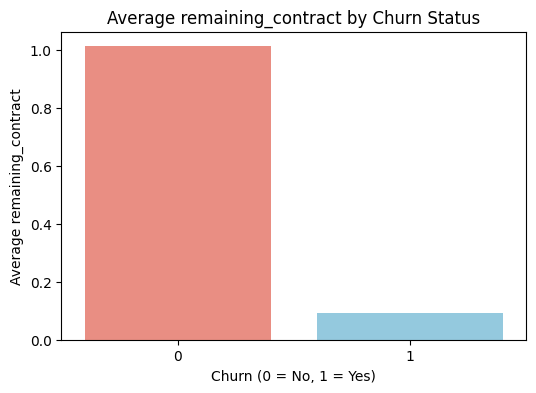

C:\Users\halah\AppData\Local\Temp\ipykernel_26680\4004212236.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='churn', y=col, data=df1,palette={'skyblue', 'salmon'}, estimator='mean', ci=None)
C:\Users\halah\AppData\Local\Temp\ipykernel_26680\4004212236.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='churn', y=col, data=df1,palette={'skyblue', 'salmon'}, estimator='mean', ci=None)


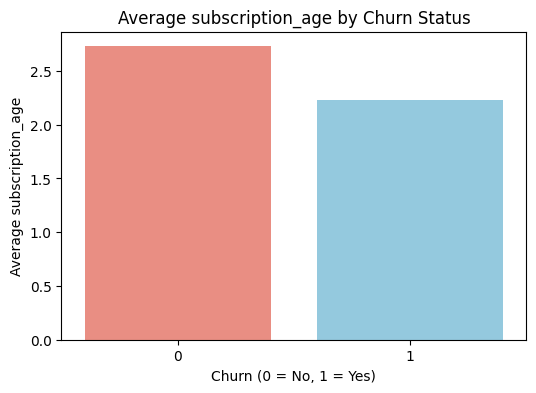

In [36]:

numeric_cols_1 = ['bill_avg', 'service_failure_count', 'download_avg', 'upload_avg','remaining_contract','subscription_age']
'''for col in numeric_cols_1:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='churn', y=col, data=df1,palette={'skyblue', 'salmon'})
    plt.title(f"{col} vs Churn")
    plt.xlabel("Churn (0 = No, 1 = Yes)")
    plt.ylabel(col)
    plt.show()
'''
for col in numeric_cols_1:
    plt.figure(figsize=(6,4))
    sns.barplot(x='churn', y=col, data=df1,palette={'skyblue', 'salmon'}, estimator='mean', ci=None)
    plt.title(f"Average {col} by Churn Status")
    plt.xlabel("Churn (0 = No, 1 = Yes)")
    plt.ylabel(f"Average {col}")
    plt.show()

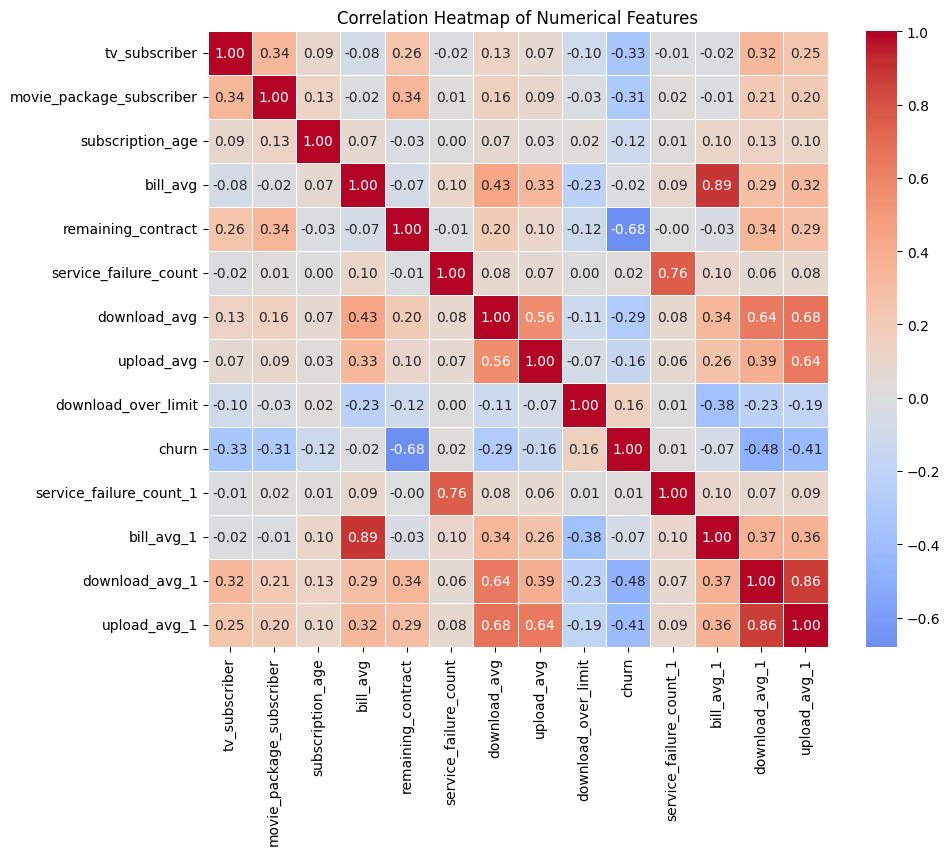

In [37]:
numeric_cols_1 = df1.select_dtypes(include=['int64', 'float64']).columns

corr = df1[numeric_cols_1].corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

Feature Engineering

In [38]:
df2 = df1.copy()

In [39]:
df2['bill_avg_per_gb'] = df2['bill_avg'] / (df2['download_avg'] + df2['upload_avg'] + 1)
df2['avg_usage'] = df2['download_avg'] + df2['upload_avg']

In [40]:
df2['near_contract_end'] = (df2['remaining_contract'] <= 1).astype(int)

Churn % by near_contract_end:
churn                      0          1
near_contract_end                      
0                  89.683843  10.316157
1                  28.635912  71.364088


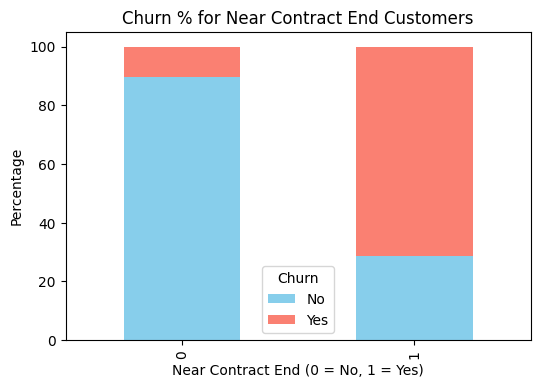

In [41]:

churn_contract = pd.crosstab(df2['near_contract_end'], df2['churn'], normalize='index') * 100

print("Churn % by near_contract_end:")
print(churn_contract)
colors = ["skyblue", "salmon"]
churn_contract.plot(kind='bar', stacked=True, figsize=(6,4), color = colors)
plt.title("Churn % for Near Contract End Customers")
plt.xlabel("Near Contract End (0 = No, 1 = Yes)")
plt.ylabel("Percentage")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()


In [42]:
df2['new_customer'] = (df2['subscription_age'] < 1).astype(int)

C:\Users\halah\AppData\Local\Temp\ipykernel_26680\4087413886.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


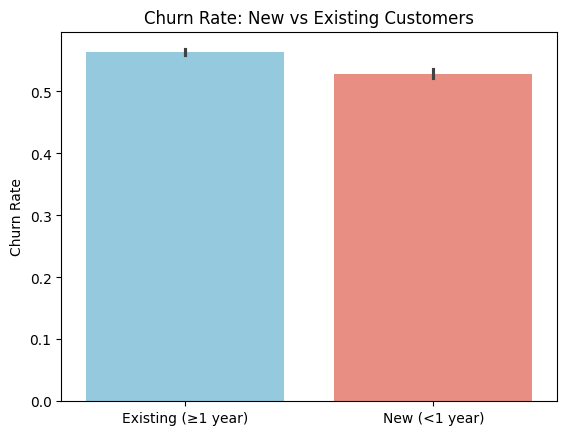

In [43]:
sns.barplot(
    data=df2,
    x='new_customer',
    y='churn',
    palette=['skyblue', 'salmon']
)
plt.title("Churn Rate: New vs Existing Customers")
plt.xticks([0,1], ['Existing (≥1 year)', 'New (<1 year)'])
plt.ylabel("Churn Rate")
plt.xlabel("")
plt.show()

In [44]:

df2['has_extra_services'] = ((df2['tv_subscriber'] + df2['movie_package_subscriber']) > 0).astype(int)
df2['bundle_size'] = df2['tv_subscriber'] + df2['movie_package_subscriber']


In [45]:
numeric_cols_2 = [
    'subscription_age',
    'bill_avg',
    'remaining_contract',
    'service_failure_count',
    'download_avg',
    'upload_avg',
    'bill_avg_per_gb', 
    'avg_usage',
]


scaler = MinMaxScaler()
df2[numeric_cols_2] = scaler.fit_transform(df2[numeric_cols_2])

df2[numeric_cols_2].head()

,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,bill_avg_per_gb,avg_usage
0,0.933697,0.061576,0.047945,0.000000,0.001903,0.005074,0.013109,0.002317
1,0.642746,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.696568,0.039409,0.000000,0.000000,0.003103,0.001985,0.006292,0.003162
3,0.537441,0.051724,0.000000,0.052632,0.000000,0.000000,0.128834,0.000000
4,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [46]:
X = df2[numeric_cols_2]

In [47]:
inertia = []
K_range = range(1, 11) 

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

ill look for elbow point where line is least slope (interia stops decreasing sharply)

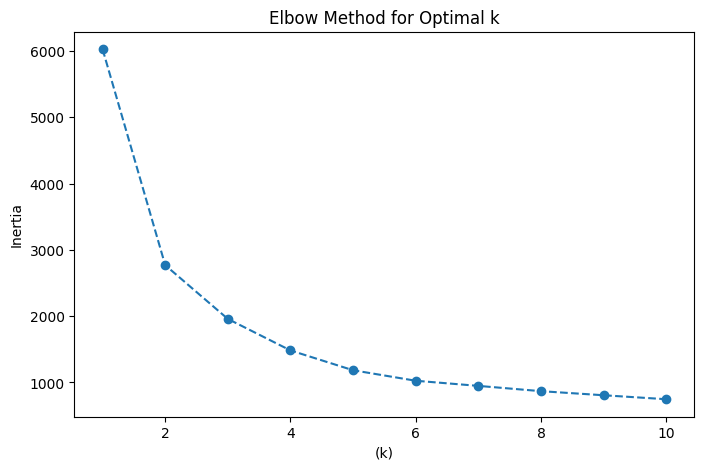

In [48]:
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel("(k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [49]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df2['cluster'] = kmeans.fit_predict(X)

print(df2['cluster'].value_counts())

cluster
0    37406
1    22594
2    12274
Name: count, dtype: int64


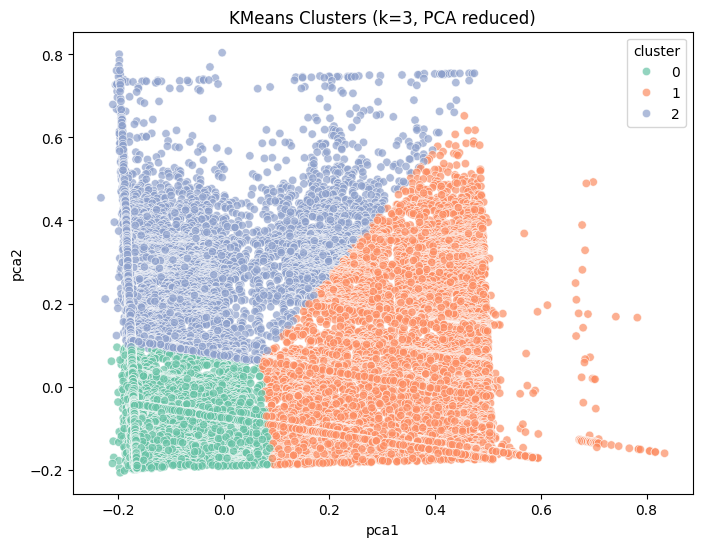

In [50]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df2['pca1'] = X_pca[:,0]
df2['pca2'] = X_pca[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df2, x='pca1', y='pca2', hue='cluster', palette='Set2', alpha=0.7)
plt.title("KMeans Clusters (k=3, PCA reduced)")
plt.show()

cluster
0    0.840186
1    0.102461
2    0.513850
Name: churn, dtype: float64


C:\Users\halah\AppData\Local\Temp\ipykernel_26680\469758630.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df2, x='cluster', y='churn', palette={'salmon', 'skyblue', 'lightgreen'})


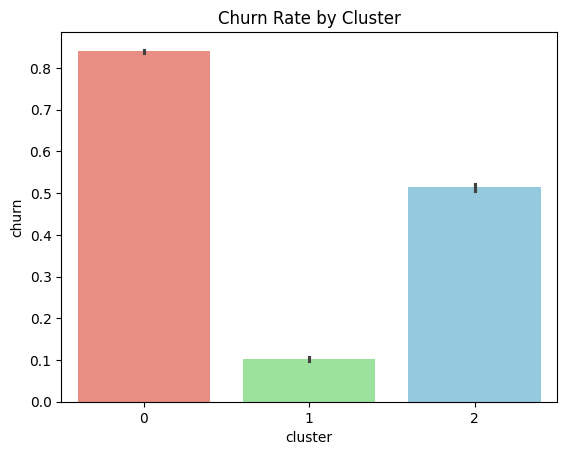

In [52]:
cluster_churn = df2.groupby('cluster')['churn'].mean()
print(cluster_churn)

sns.barplot(data=df2, x='cluster', y='churn', palette={'salmon', 'skyblue', 'lightgreen'})
plt.title("Churn Rate by Cluster")
plt.show()

In [54]:
cluster_profile = df2.groupby('cluster')[numeric_cols_2].mean().round(2)

# Add churn rate per cluster
cluster_profile['churn_rate'] = df2.groupby('cluster')['churn'].mean().round(2)

# Add number of customers per cluster
cluster_profile['count'] = df2['cluster'].value_counts()

print(cluster_profile)

         subscription_age  bill_avg  remaining_contract  \
cluster                                                   
0                    0.13      0.05                0.02   
1                    0.16      0.04                0.48   
2                    0.44      0.05                0.08   

         service_failure_count  download_avg  upload_avg  bill_avg_per_gb  \
cluster                                                                     
0                         0.01          0.01        0.01             0.03   
1                         0.01          0.01        0.01             0.01   
2                         0.02          0.01        0.01             0.01   

         avg_usage  churn_rate  count  
cluster                                
0             0.01        0.84  37406  
1             0.01        0.10  22594  
2             0.01        0.51  12274  


Cluster 0

Very low subscription age (0.13, scaled) → mostly new customers.

Very low contract (0.02) → no/short contract commitment.

Very high churn rate (84%).

Largest group (37k customers).
 Interpretation: At-risk new customers. They join, don’t have contracts, and leave quickly.

Cluster 1

Low bill (0.04) + low usage.

Long remaining contracts (0.48) → many are locked into contracts.

Very low churn rate (10%).

Group size: ~22k.
 Interpretation: Stable contract customers. Low usage, low bills, but committed.

Cluster 2

Higher subscription age (0.44) → more experienced customers.

Slightly higher service failures (0.02).

Medium churn rate (51%).

~12k customers.
 Interpretation: Older customers who churn moderately — maybe frustrated with service failures or seeking alternatives.

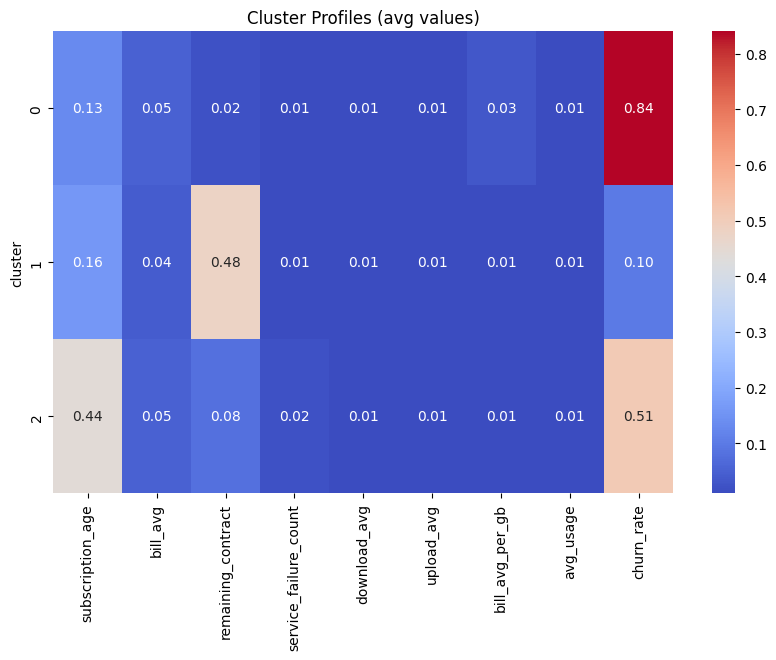

In [55]:
plt.figure(figsize=(10,6))
sns.heatmap(cluster_profile.drop(columns='count'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Cluster Profiles (avg values)")
plt.show()


 biggest churn risk = Cluster 0 (new customers with no contracts)

 most valuable stable customers = Cluster 1 (contract-locked)

Cluster 2 = somewhere in between, loyal but at risk due to issues.